In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Equalização de Histograma usando Equalização Adaptativa Limitada a Contraste (CLAHE)

Definindo Funções

In [2]:
def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 5, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def equalize_clahe_color_hsv(img):
    """Equalize the image splitting it after conversion to HSV and applying CLAHE
    to the V channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eq_V = cla.apply(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
    return eq_image


def equalize_clahe_color_lab(img):
    """Equalize the image splitting it after conversion to LAB and applying CLAHE
    to the L channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    L, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2Lab))
    eq_L = cla.apply(L)
    eq_image = cv2.cvtColor(cv2.merge([eq_L, a, b]), cv2.COLOR_Lab2BGR)
    return eq_image


def equalize_clahe_color_yuv(img):
    """Equalize the image splitting it after conversion to YUV and applying CLAHE
    to the Y channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    Y, U, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2YUV))
    eq_Y = cla.apply(Y)
    eq_image = cv2.cvtColor(cv2.merge([eq_Y, U, V]), cv2.COLOR_YUV2BGR)
    return eq_image


def equalize_clahe_color(img):
    """Equalize the image splitting the image applying CLAHE to each channel
    and merging the results
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cla.apply(ch))

    eq_image = cv2.merge(eq_channels)
    return eq_image

def kmeans_algorithm(input_image):
    two_dimensional_image = input_image.reshape((-1, 3))
    two_dimensional_image = np.float32(two_dimensional_image)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    clusters = 3
    flags = cv2.KMEANS_PP_CENTERS

    result_image_compactness, result_image_labels, result_image_centers = cv2.kmeans(two_dimensional_image, clusters, None, criteria, 10, flags)

    result_image_centers = np.uint8(result_image_centers)
    result_image = result_image_centers[result_image_labels.flatten()]
    result_image = result_image.reshape((input_image.shape))

    thresholded_blue_component, thresholded_green_component, thresholded_red_component = cv2.split(result_image)

    used_threshold, thresholded_bgr_image = cv2.threshold(result_image, 130, 255, cv2.THRESH_BINARY)
    thresholded_blue_component, thresholded_green_component, thresholded_red_component = cv2.split(thresholded_bgr_image)
    return thresholded_red_component

def remove_fundo(input_image):
    red_comp = kmeans_algorithm(input_image)
    mask_kmeans = red_comp
    mask_kmeans_filtered = cv2.medianBlur(mask_kmeans, 5)
    result_image = cv2.bitwise_and(input_image, input_image, mask = mask_kmeans_filtered)
    nobackgroung_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    return nobackgroung_image

In [3]:
def CLAHE_test(input_image):
    # Cria as dimensões da imagem e seta o título
    plt.figure(figsize=(18, 14))
    plt.suptitle("Histogram equalization using CLAHE", fontsize=16, fontweight='bold')
    
    image = remove_fundo(input_image)

    # Carrega a imagem para escala de cinza
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicando CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0)

    # Aplicando CLAHE para a imagem na escala de cinza variando o parâmetro de clipLimit:
    gray_image_clahe = clahe.apply(gray_image)
    clahe.setClipLimit(5.0)
    gray_image_clahe_2 = clahe.apply(gray_image)
    clahe.setClipLimit(10.0)
    gray_image_clahe_3 = clahe.apply(gray_image)
    clahe.setClipLimit(20.0)
    gray_image_clahe_4 = clahe.apply(gray_image)

    # Utilizando as funções criadas para equalizar imagens com CLAHE
    image_clahe_color = equalize_clahe_color(image)
    image_clahe_color_lab = equalize_clahe_color_lab(image)
    image_clahe_color_hsv = equalize_clahe_color_hsv(image)
    image_clahe_color_yuv = equalize_clahe_color_yuv(image)

    # Plotando todas as imagens
    show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
    show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=2.0", 2)
    show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_2, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=5.0", 3)
    show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_3, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=10.0", 4)
    show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_4, cv2.COLOR_GRAY2BGR), "gray CLAHE clipLimit=20.0", 5)
    show_img_with_matplotlib(image, "color", 6)
    show_img_with_matplotlib(image_clahe_color, "clahe on each channel (BGR)", 7)
    show_img_with_matplotlib(image_clahe_color_lab, "clahe on L channel (LAB)", 8)
    show_img_with_matplotlib(image_clahe_color_hsv, "clahe on V channel (HSV)", 9)
    show_img_with_matplotlib(image_clahe_color_yuv, "clahe on Y channel (YUV)", 10)

    plt.show()

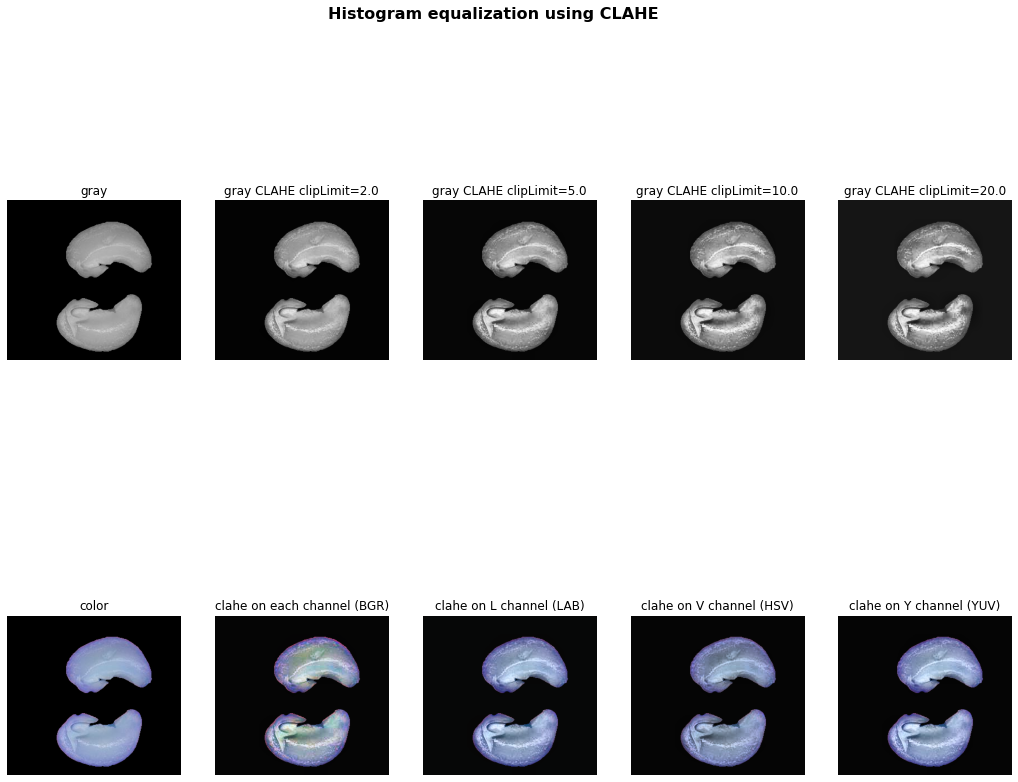

In [4]:
image = cv2.imread('./embriaoteste.png')
CLAHE_test(image)

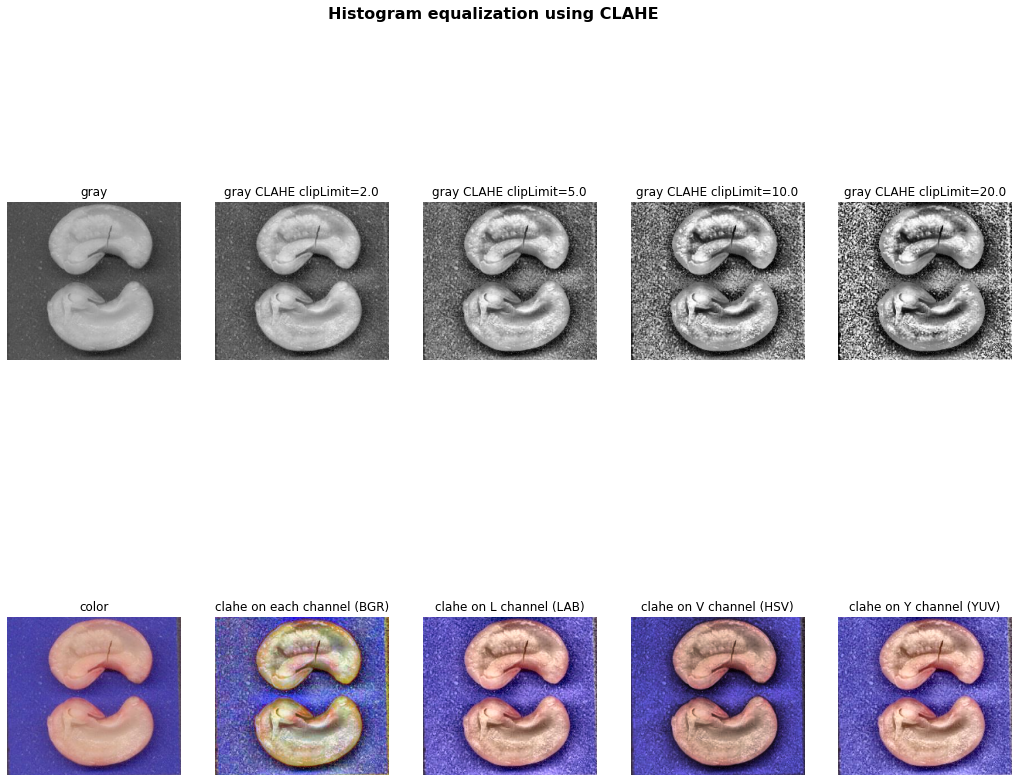

In [5]:
image = cv2.imread('./embriaoteste2.png')
CLAHE_test(image)

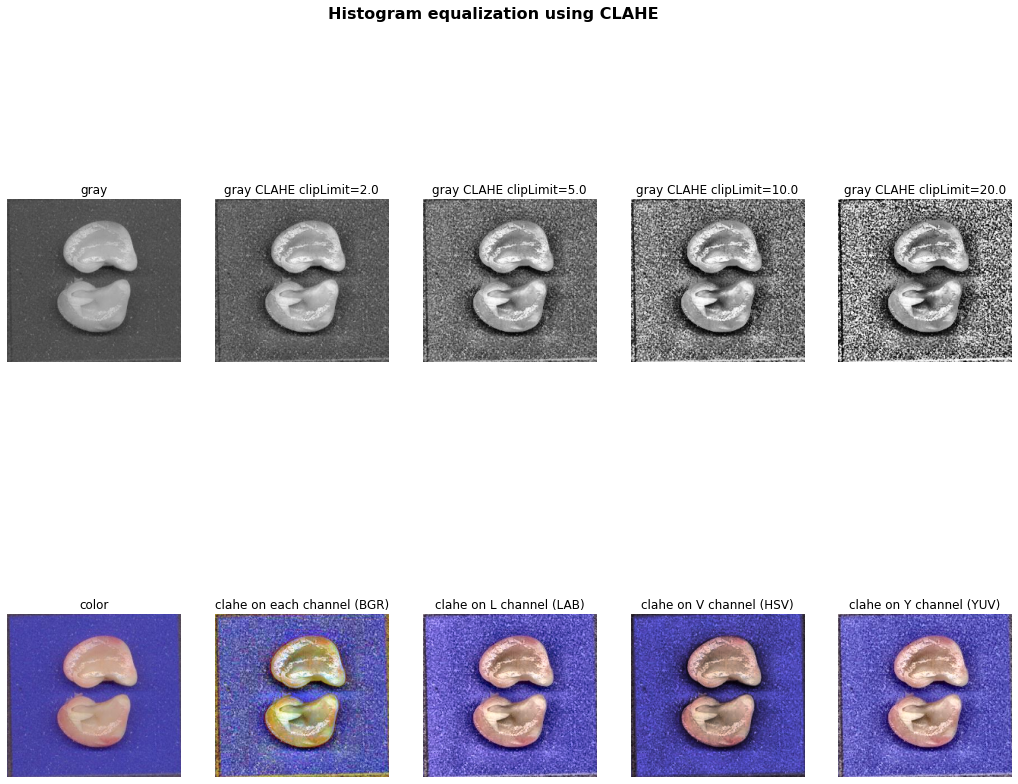

In [6]:
image = cv2.imread('./embriaoteste3.png')
CLAHE_test(image)

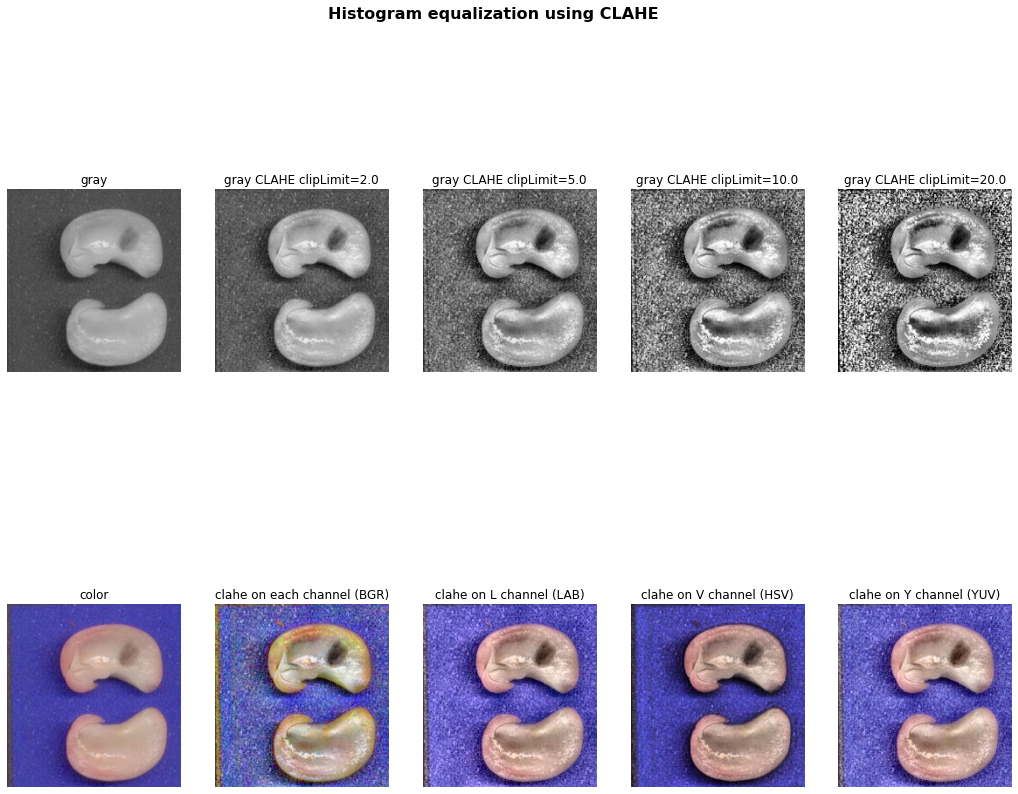

In [7]:
image = cv2.imread('./embriaoteste4.png')
CLAHE_test(image)

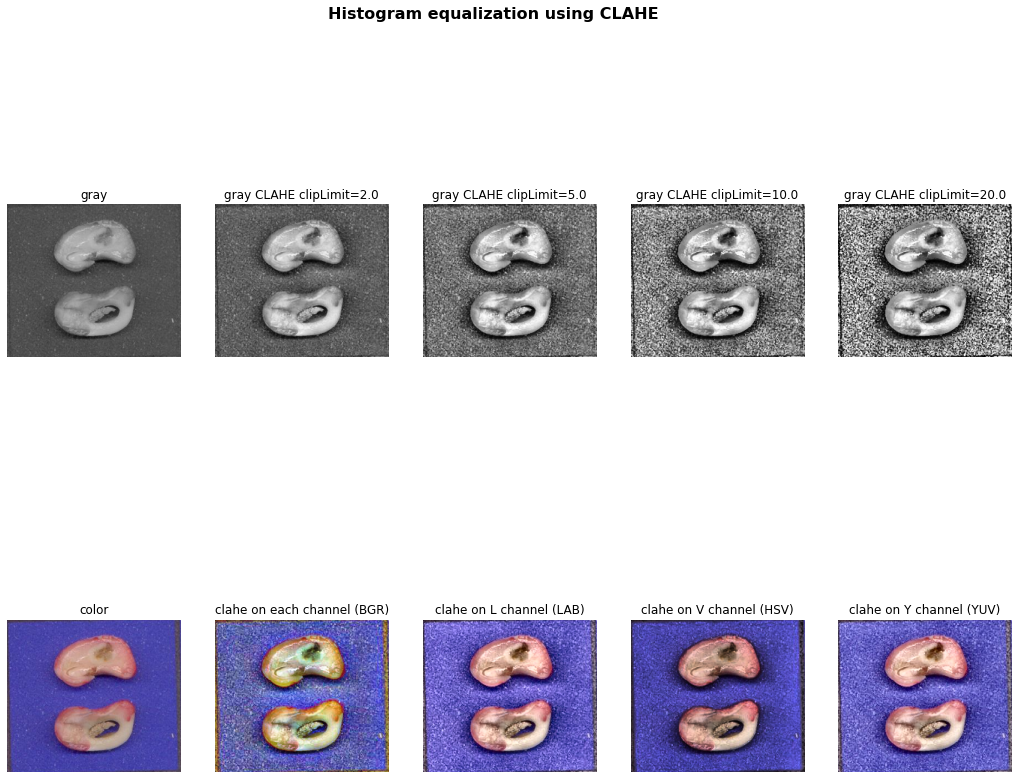

In [8]:
image = cv2.imread('./embriaoteste5.png')
CLAHE_test(image)

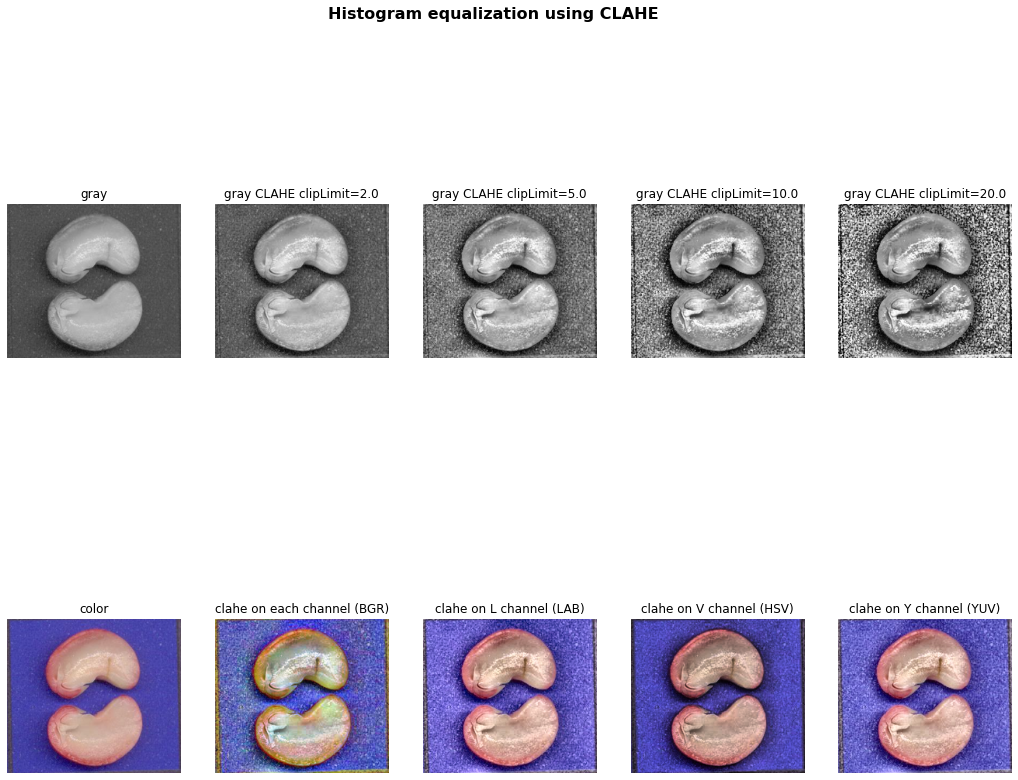

In [9]:
image = cv2.imread('./embriaoteste6.png')
CLAHE_test(image)

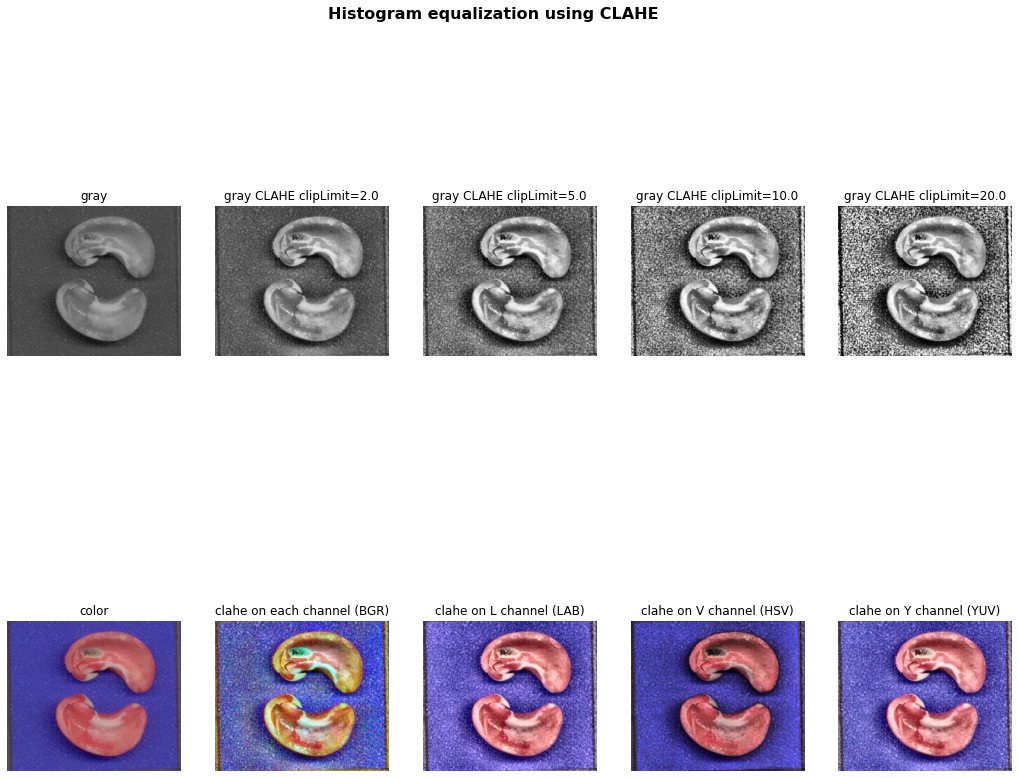

In [10]:
image = cv2.imread('./embriaoteste7.png')
CLAHE_test(image)